In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
dftrain=pd.read_csv('/kaggle/input/titanic/train.csv')
dfeval=pd.read_csv('/kaggle/input/titanic/test.csv')

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

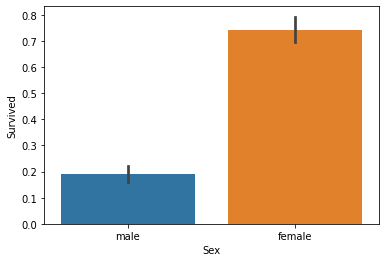

In [4]:
sns.barplot(x='Sex',y='Survived', data=dftrain)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

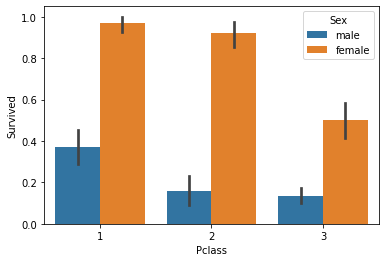

In [5]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=dftrain)

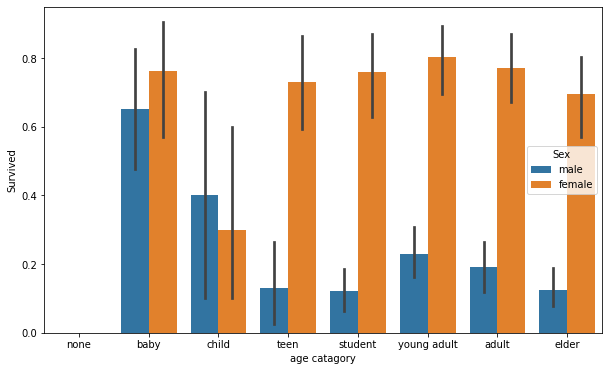

In [6]:
def get_age_catagory(age):
    catagory=''
    if age<=-1: 
        catagory='none'
    elif age<=5:
        catagory='baby'
    elif age<=10:
        catagory='child'
    elif age<=18:
        catagory='teen'
    elif age<=25:
        catagory='student'
    elif age<=35:
        catagory='young adult'
    elif age<=60:
        catagory='adult'
    else:
        catagory='elder'
    return catagory

plt.figure(figsize=(10,6))

groups=['none','baby','child','teen','student','young adult','adult','elder']

dftrain['age catagory']=dftrain['Age'].apply(lambda x:get_age_catagory(x))

sns.barplot(x='age catagory', y='Survived', hue='Sex', data=dftrain, order=groups)

dftrain.drop('age catagory', axis=1, inplace=True)